In [14]:
library(tidyverse)
library(dplyr)

# https://www.ggplot2-exts.org
# http://rstudio.com/cheatsheets
# ?stat_bin

# ggplot(data = <DATA>) +
#   <GEOM_FUNCTION>(
#     mapping = aes(<MAPPINGS>),
#     stat = <STAT>,
#     position = <POSITION>
#   ) +
#   <COORDINATE_FUNCTION> +
#   <FACET_FUNCTION>

In [2]:
head(ggplot2::diamonds)
# help(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


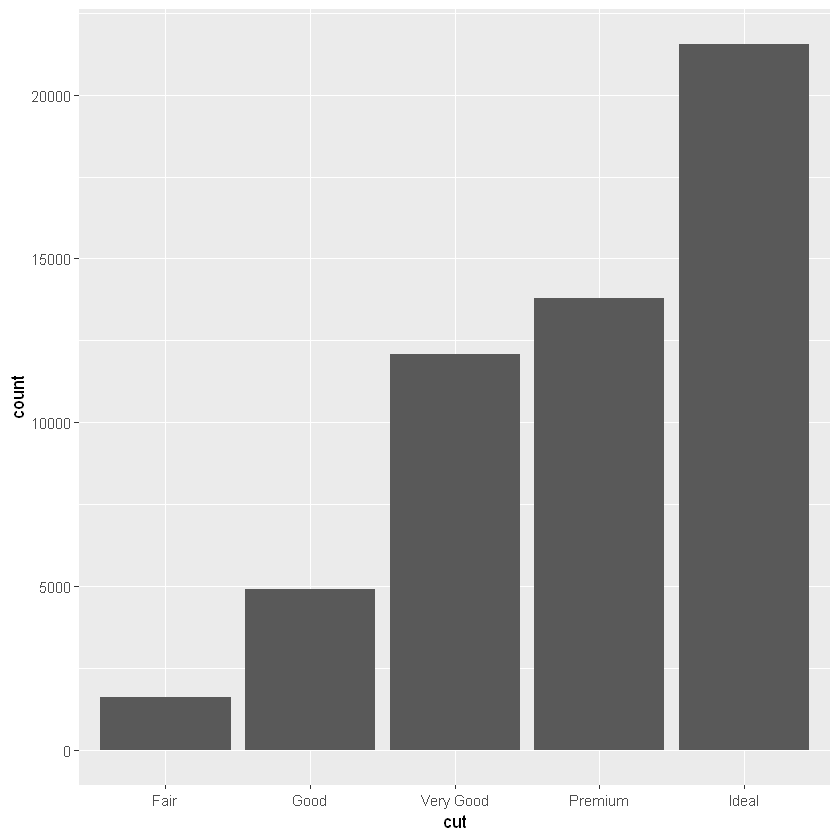

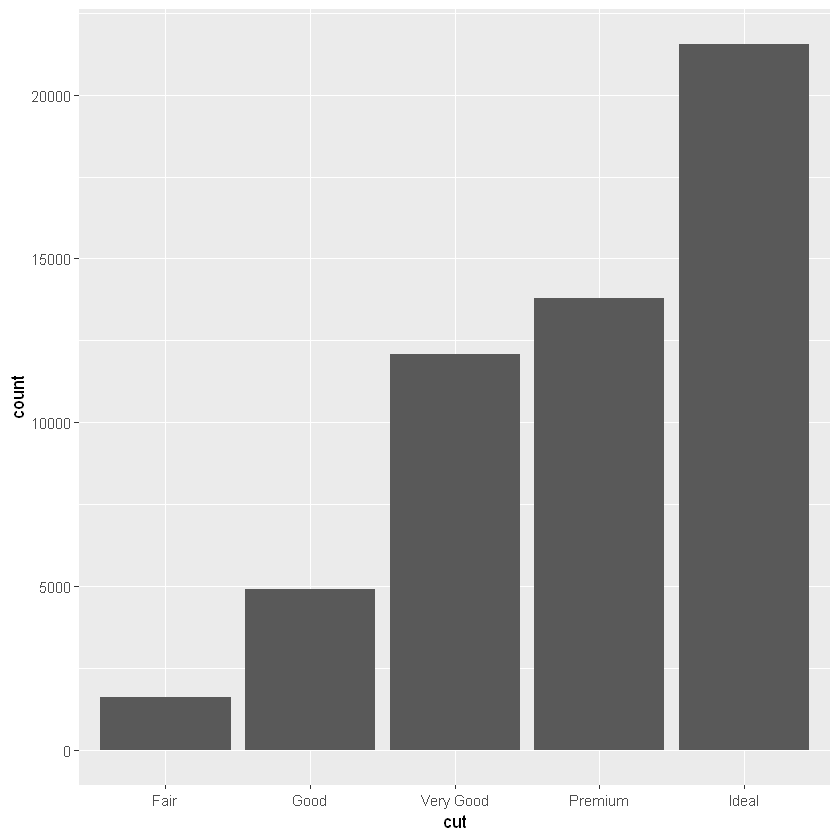

In [3]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut))

# same
ggplot(data = diamonds) +
stat_count(mapping = aes(x = cut))

# ?stat_count

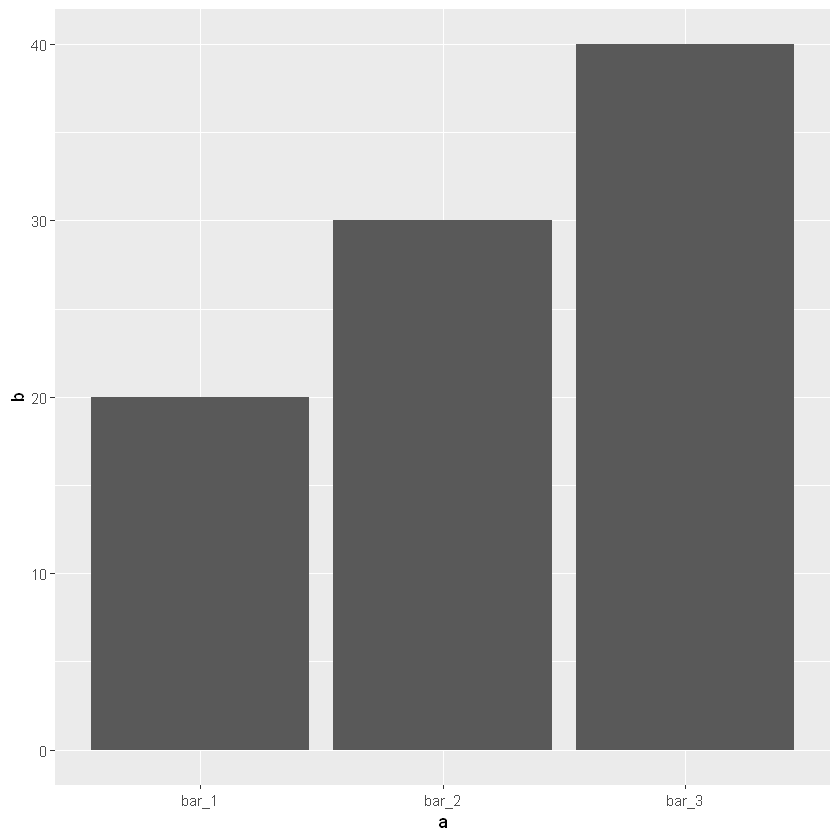

In [4]:
# artificial example
demo <- tribble(
~a, ~b,
"bar_1", 20,
"bar_2", 30,
"bar_3", 40
)
ggplot(data = demo) +
geom_bar(
mapping = aes(x = a, y = b), stat = "identity"
)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."

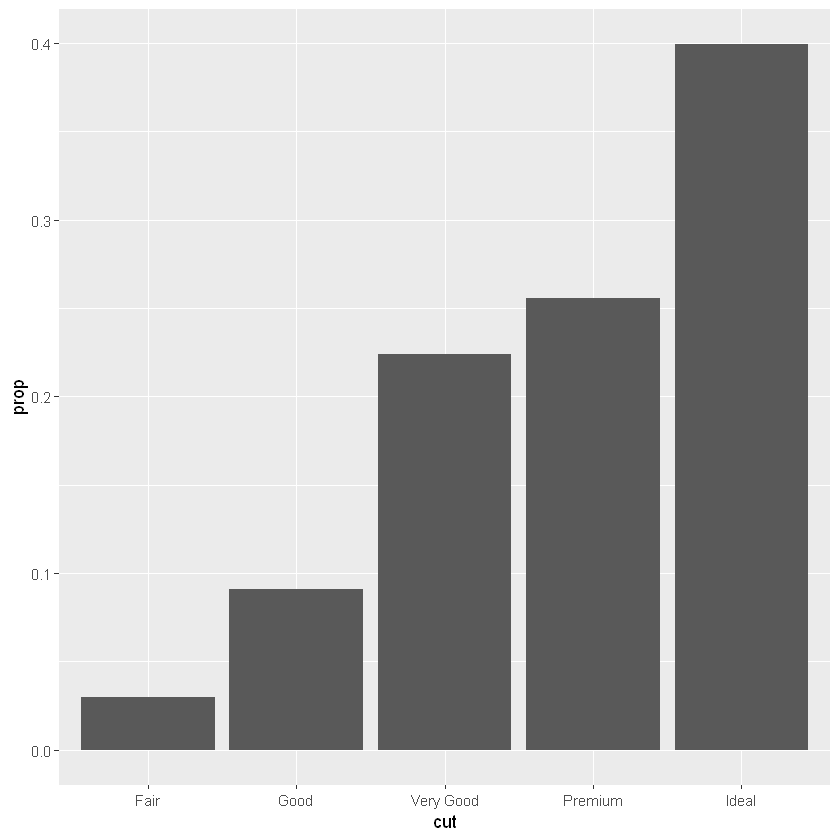

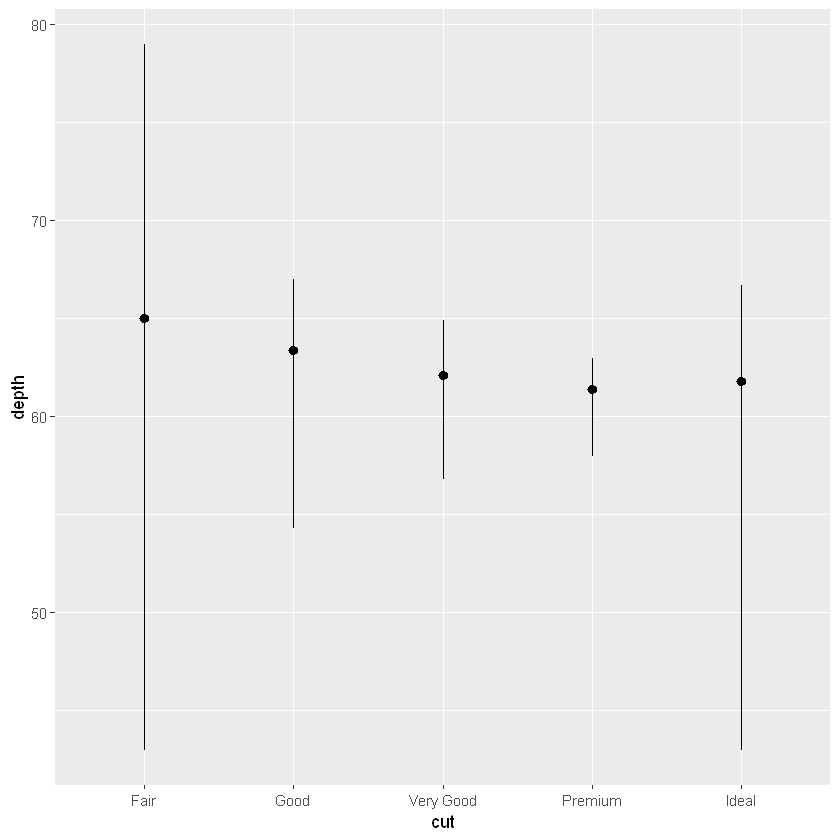

In [32]:
ggplot(data = diamonds) +
geom_bar(
mapping = aes(x = cut, y = ..prop.., group = 1)
)


ggplot(data = diamonds) +
stat_summary(
mapping = aes(x = cut, y = depth),
fun.ymin = min,
fun.ymax = max,
fun.y = median

)



No summary function supplied, defaulting to `mean_se()`


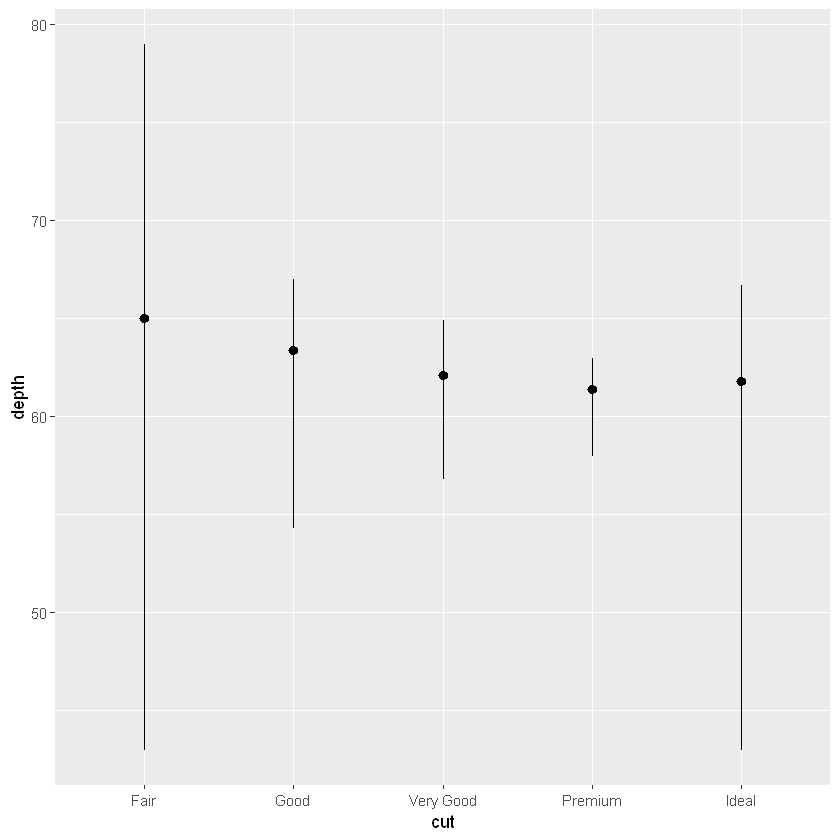

No summary function supplied, defaulting to `mean_se()`


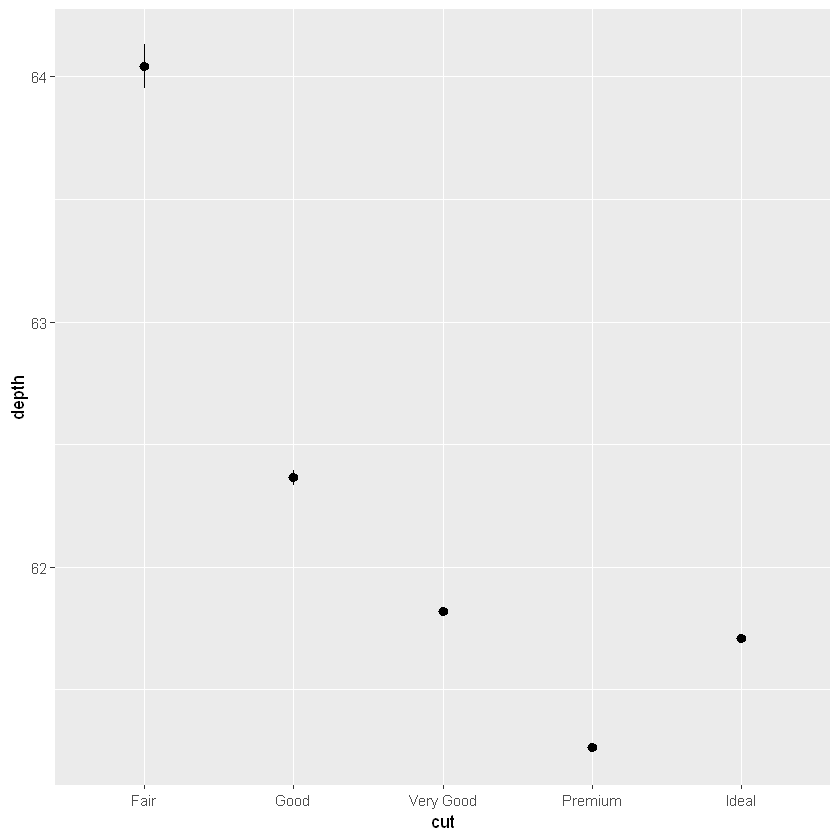

Warning message:
"Ignoring unknown parameters: fun.ymin, fun.ymax, fun.y"No summary function supplied, defaulting to `mean_se()`


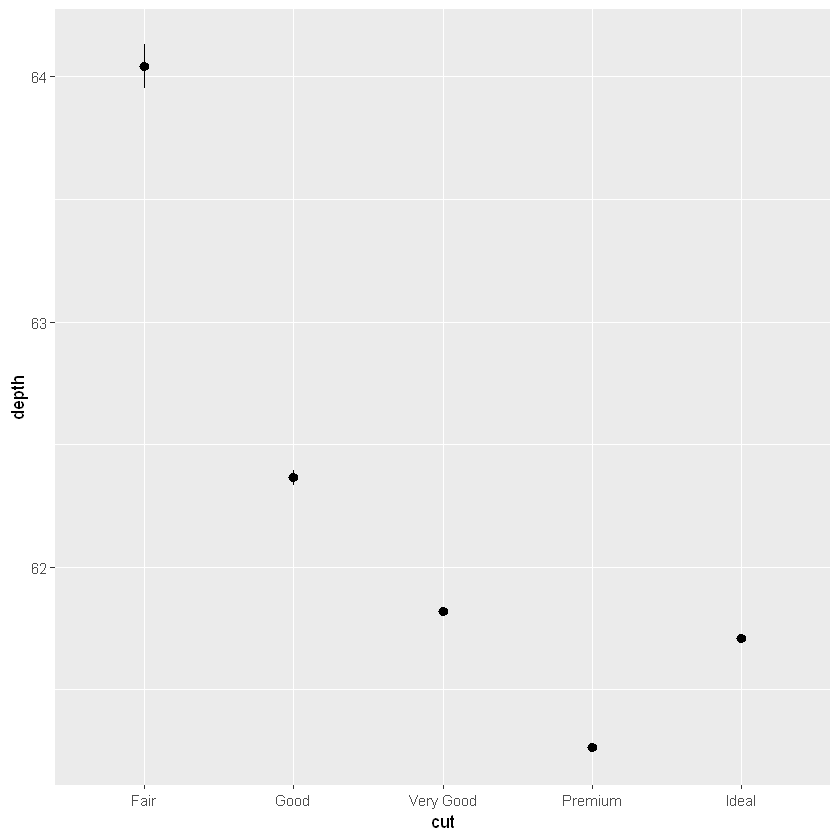

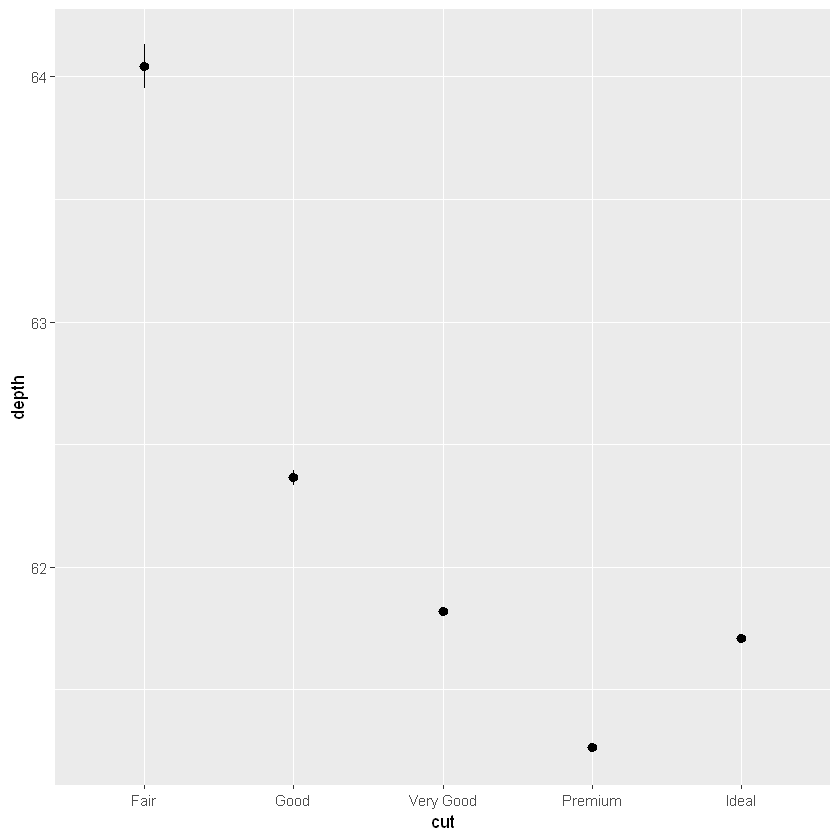

In [30]:
# modification according to warning messege


ggplot(data = diamonds) +
stat_summary( # default geom_pointrange
mapping = aes(x = cut, y = depth),
    fun.min = min,
    fun.max = max,
    fun = median
)

# Exercise page 26
# why it is wrong ?
ggplot(data = diamonds,mapping  = aes(x = cut, y = depth)) +
geom_pointrange( stat = "summary")

ggplot(data = diamonds) +
  geom_pointrange(
    mapping = aes(x = cut, y = depth),
    stat = "summary"
  )

ggplot(data = diamonds) +
  geom_pointrange(
    mapping = aes(x = cut, y = depth),
    stat = "summary",
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

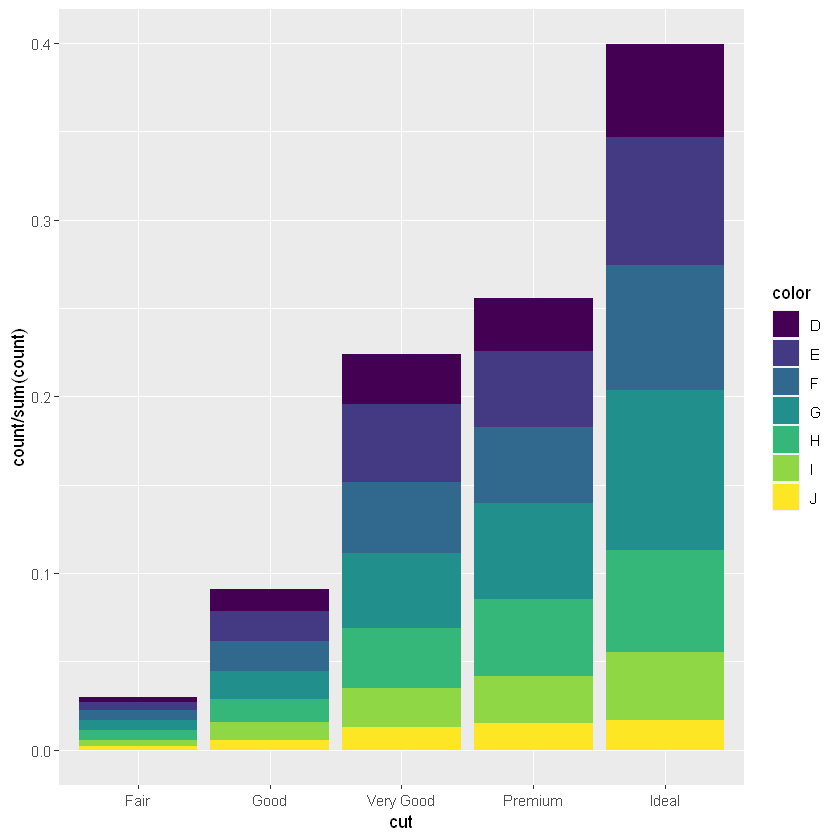

In [33]:
# ?stat_summary
# https://ggplot2.tidyverse.org/reference/
# Exercise page 26

ggplot(data = diamonds) + 
  geom_bar(aes(x = cut, y = ..count.. / sum(..count..), fill = color))

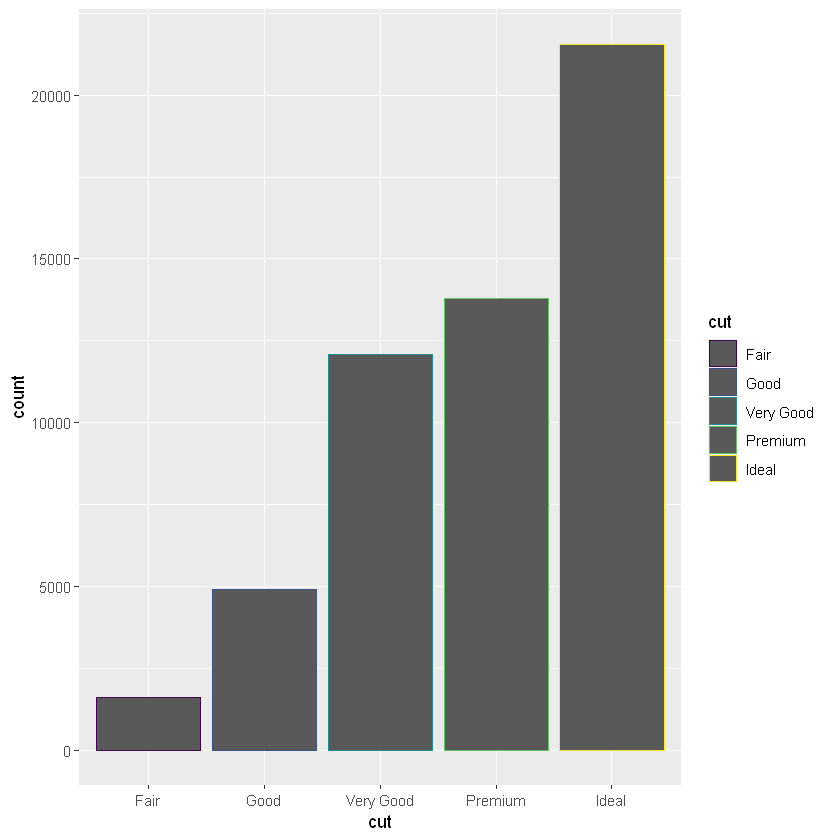

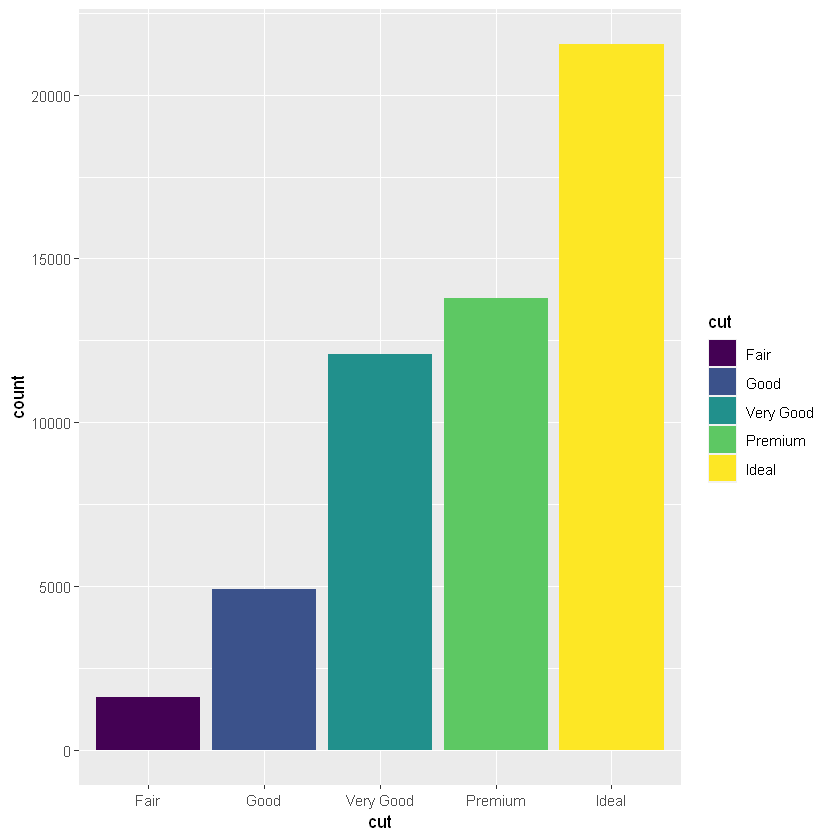

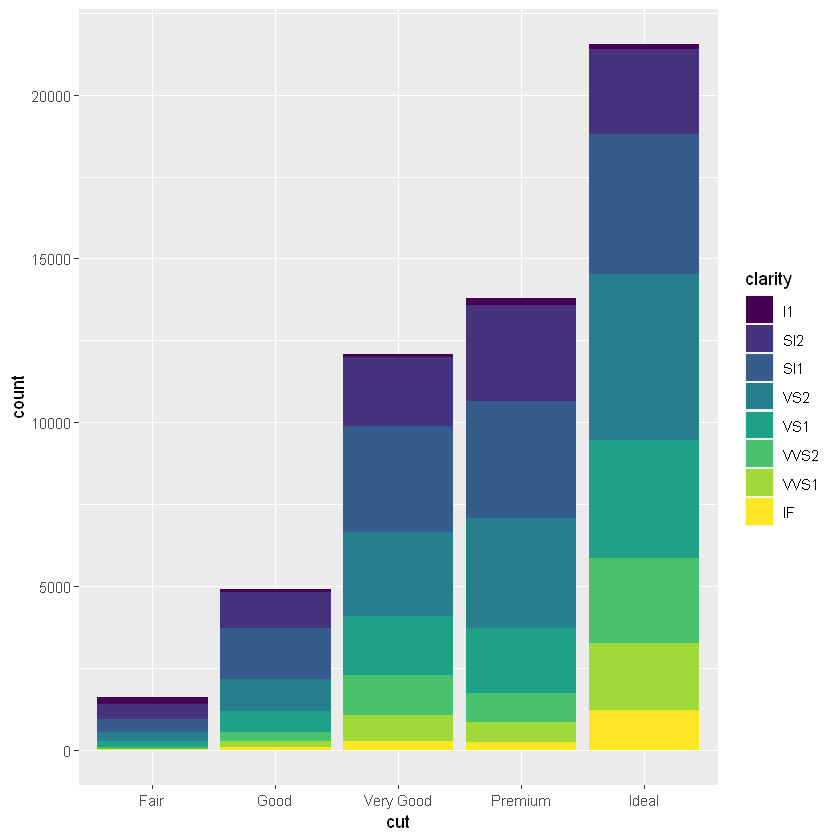

In [34]:
# Page 27

ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, color = cut))

ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, fill = cut))

ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, fill = clarity))

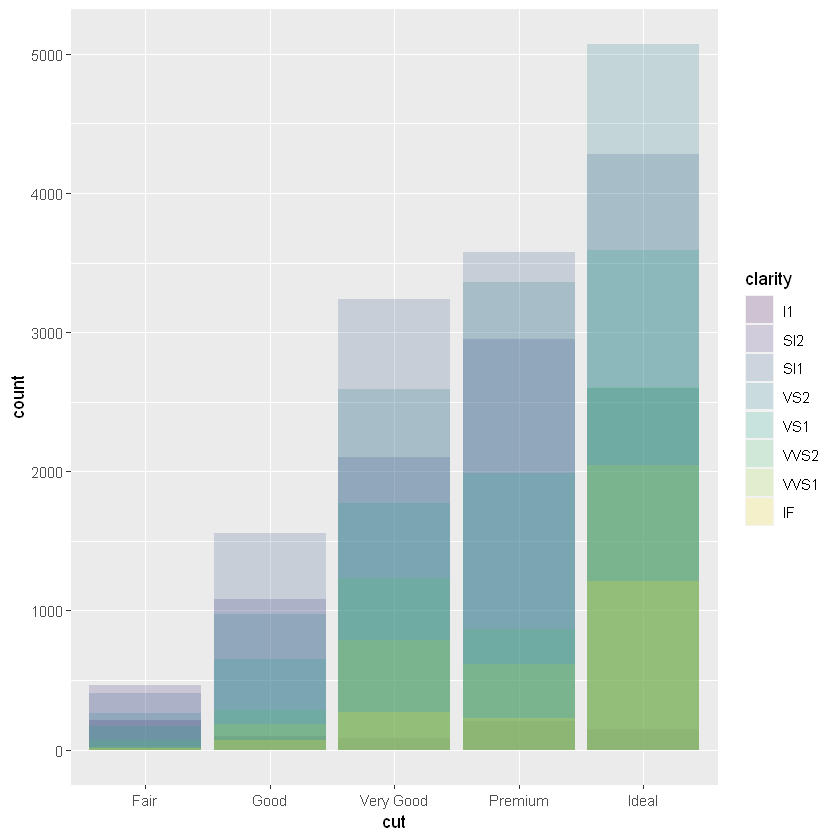

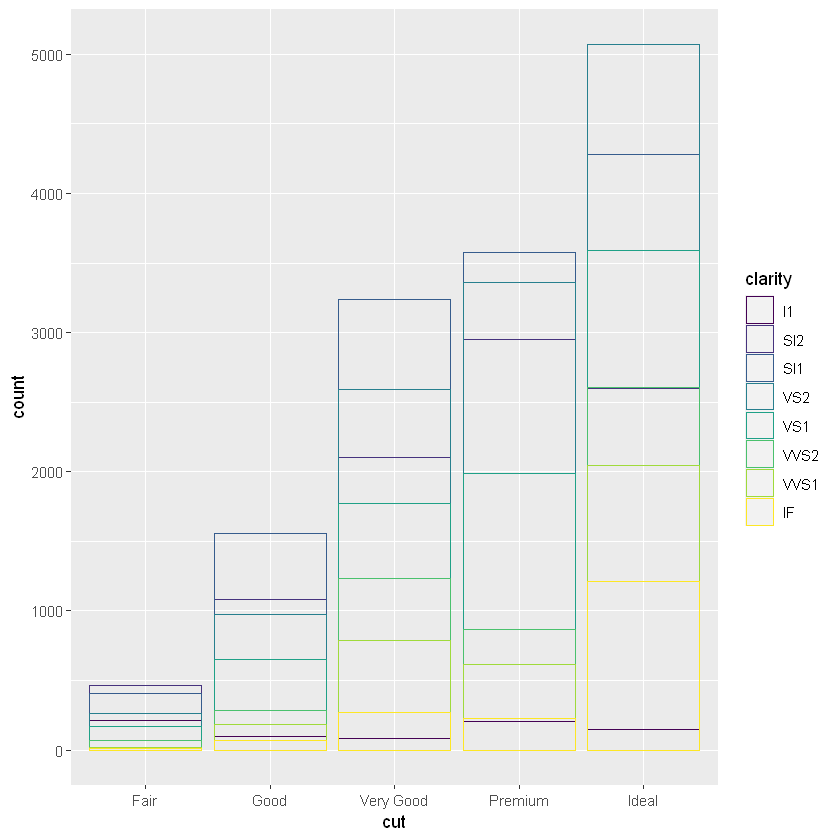

In [35]:
ggplot(
data = diamonds,
mapping = aes(x = cut, fill = clarity)
) +
geom_bar(alpha = 1/5, position = "identity")


ggplot(
data = diamonds,
mapping = aes(x = cut, color = clarity)
) +
geom_bar(fill = NA, position = "identity")

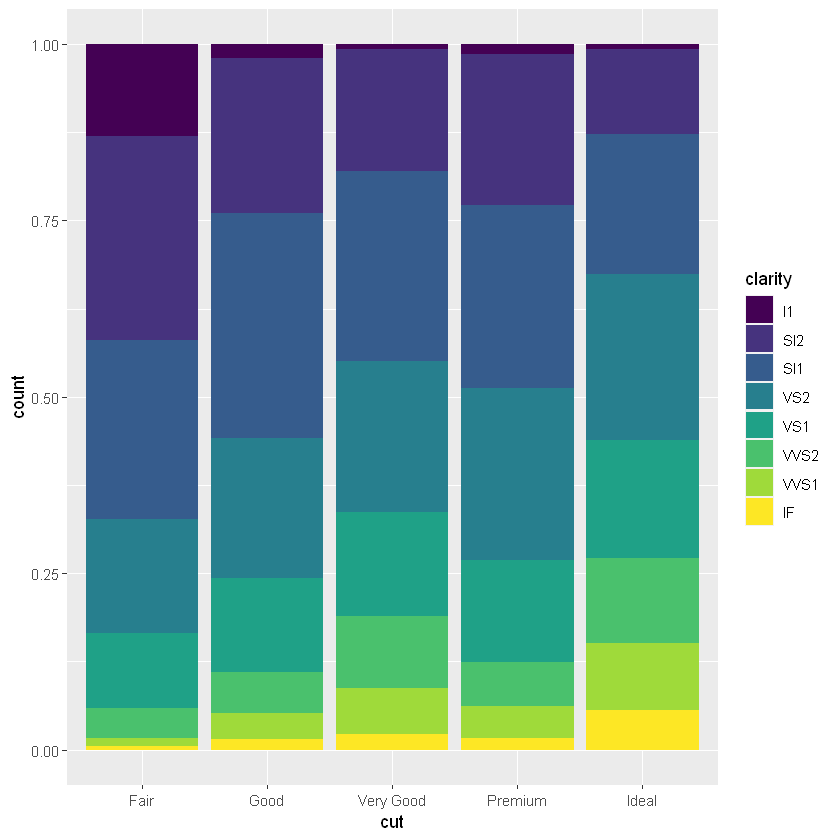

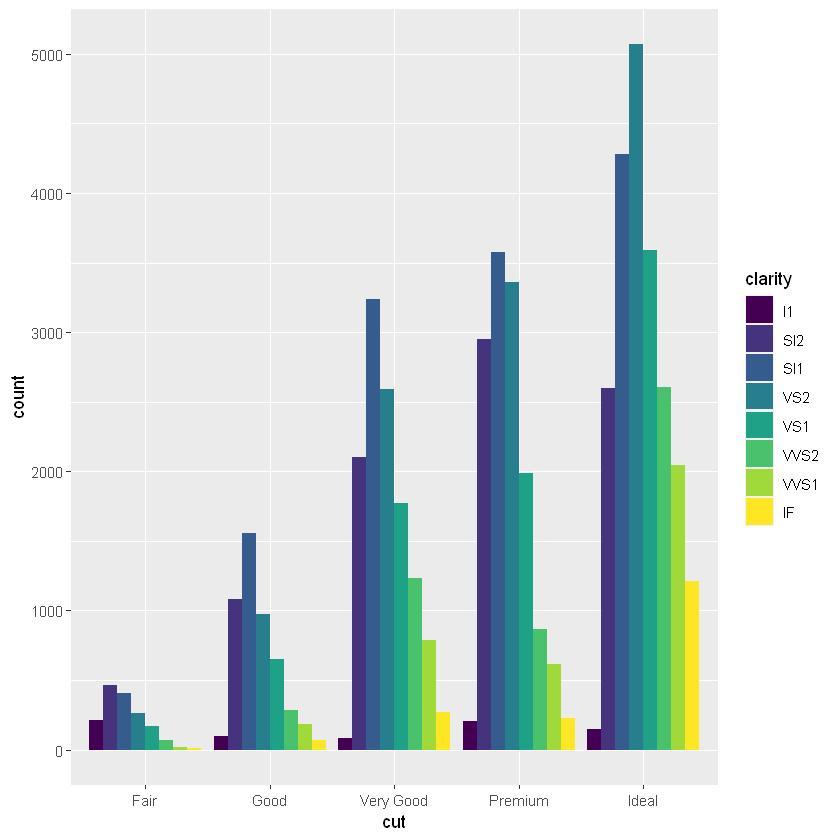

In [36]:
ggplot(data = diamonds) +
geom_bar(
mapping = aes(x = cut, fill = clarity),
position = "fill"
)

ggplot(data = diamonds) +
geom_bar(
mapping = aes(x = cut, fill = clarity),
position = "dodge"
)

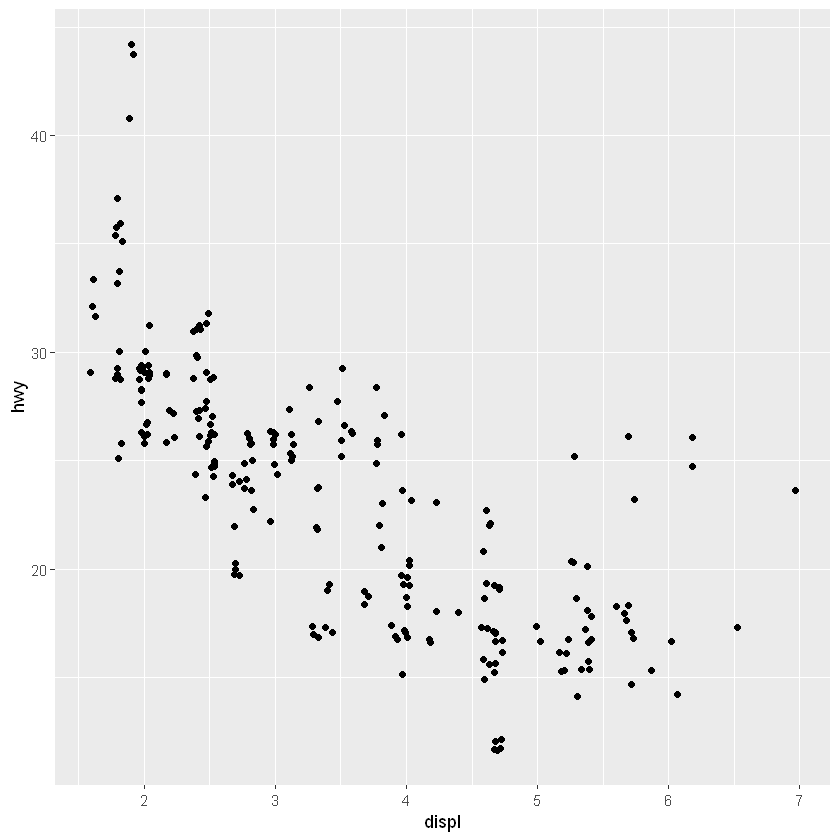

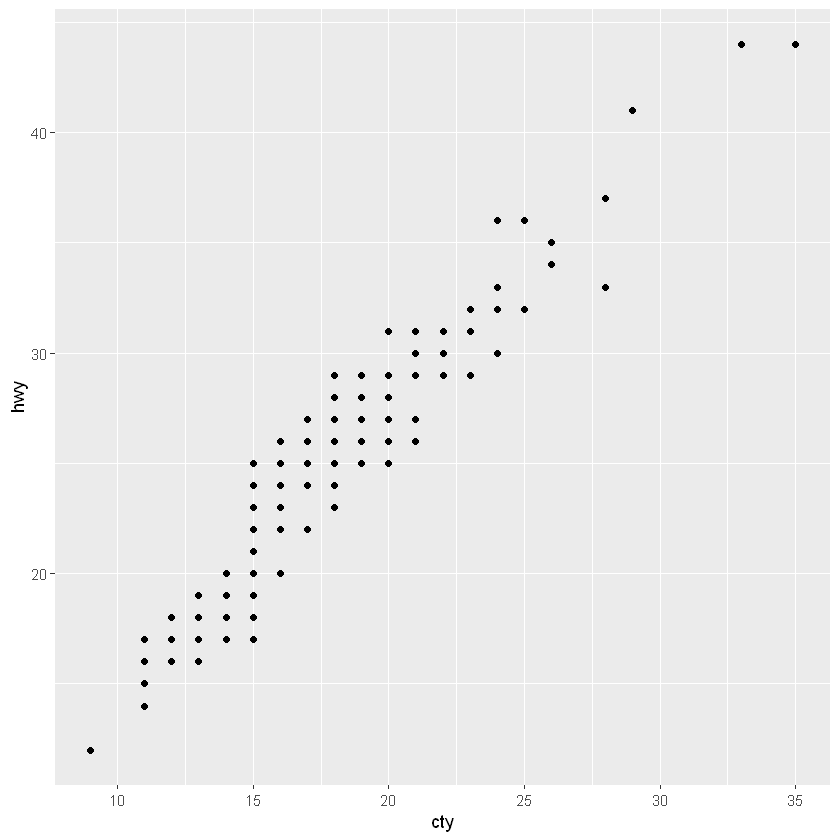

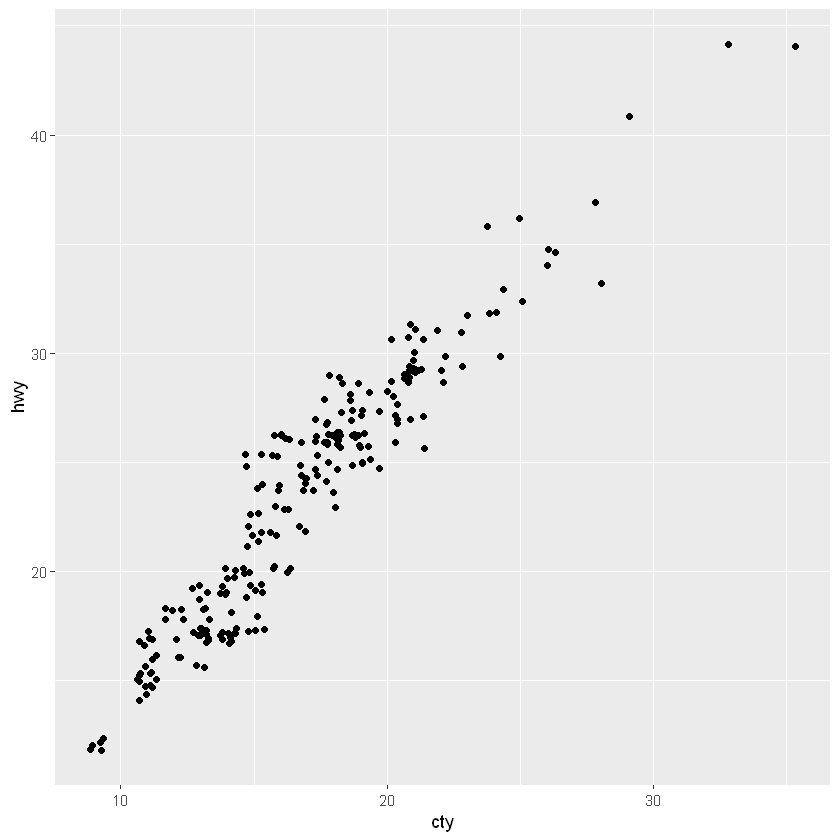

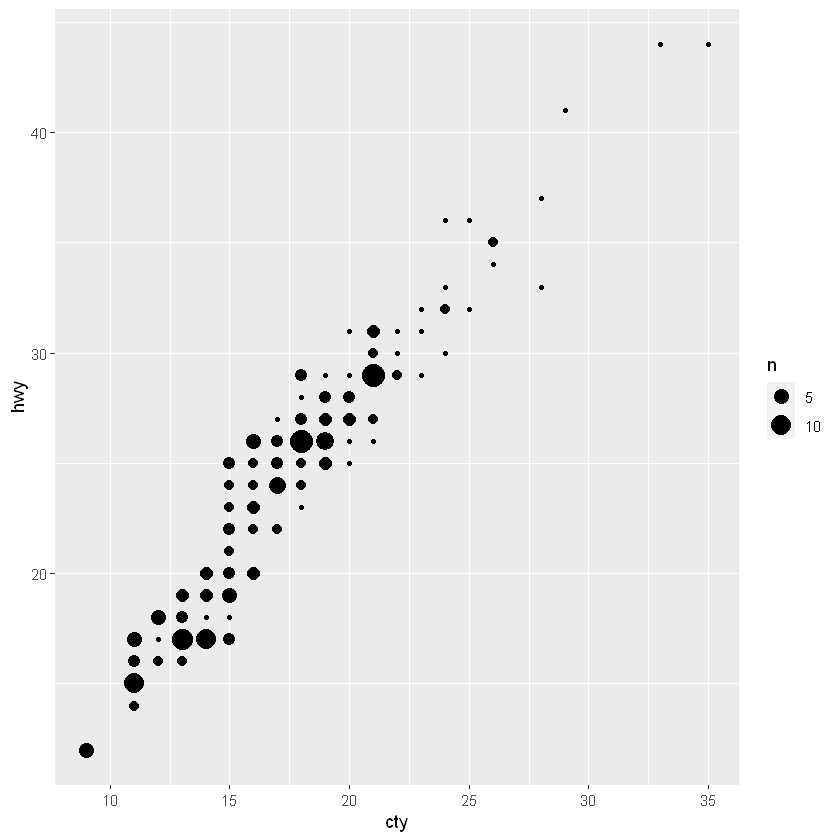

In [45]:
# jitter!!! add noise for good plots. What ?
ggplot(data = mpg) +
geom_point(
mapping = aes(x = displ, y = hwy),
position = "jitter"
)


# Ex
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
geom_point()

ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
geom_jitter()

ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
geom_count()

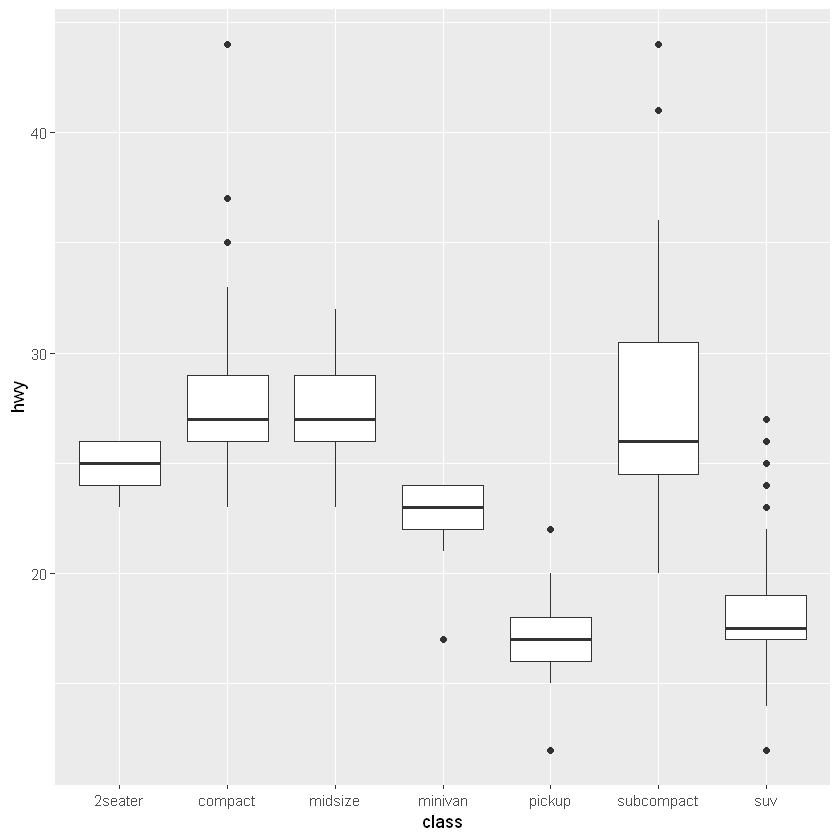

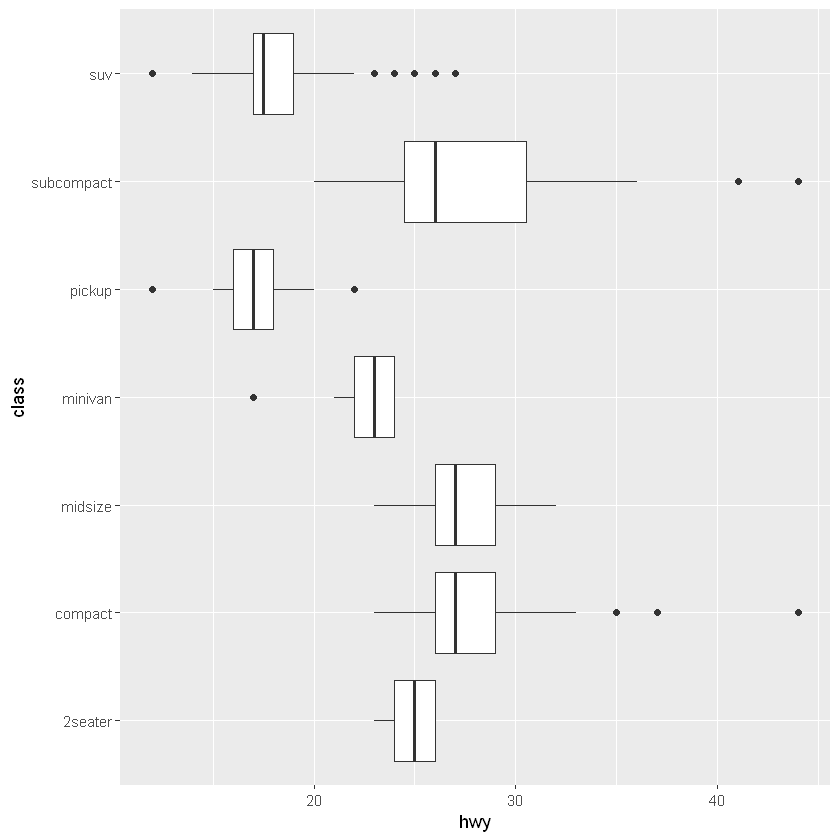

In [46]:
# co-ordinate system
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
geom_boxplot()


ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
geom_boxplot() +
coord_flip()

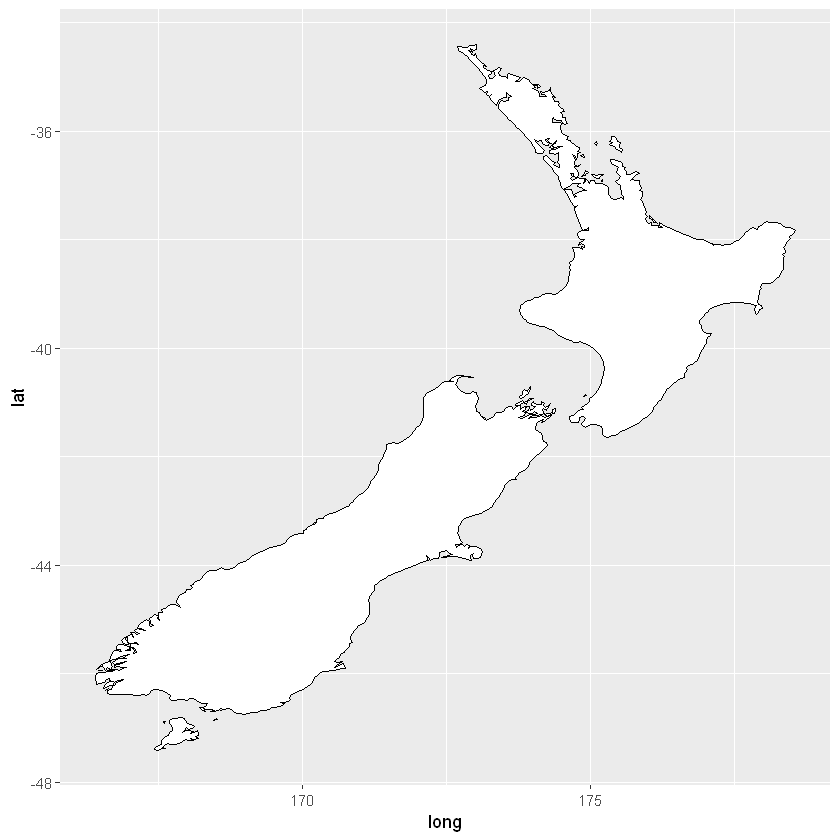

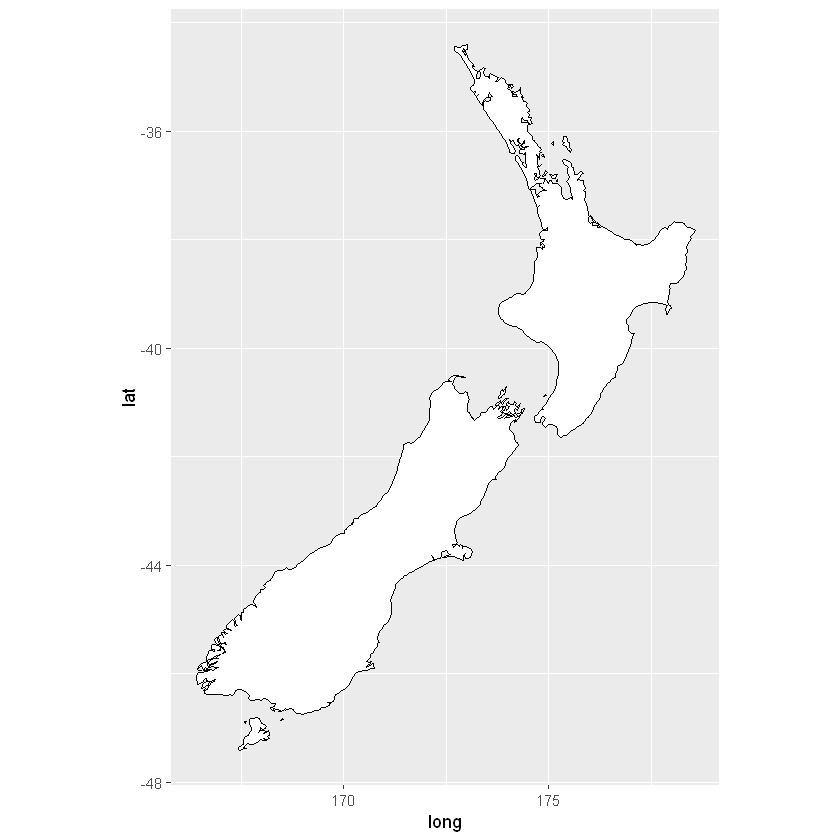

In [47]:
nz <- map_data("nz")

ggplot(nz, aes(long, lat, group = group)) +
geom_polygon(fill = "white", color = "black")

ggplot(nz, aes(long, lat, group = group)) +
geom_polygon(fill = "white", color = "black") +
coord_quickmap()

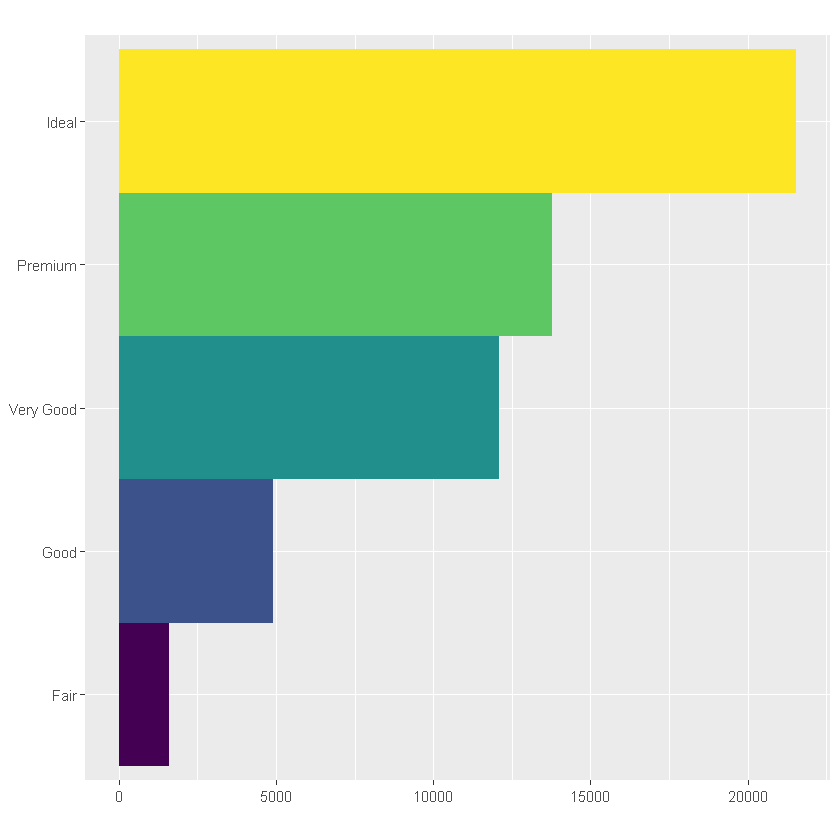

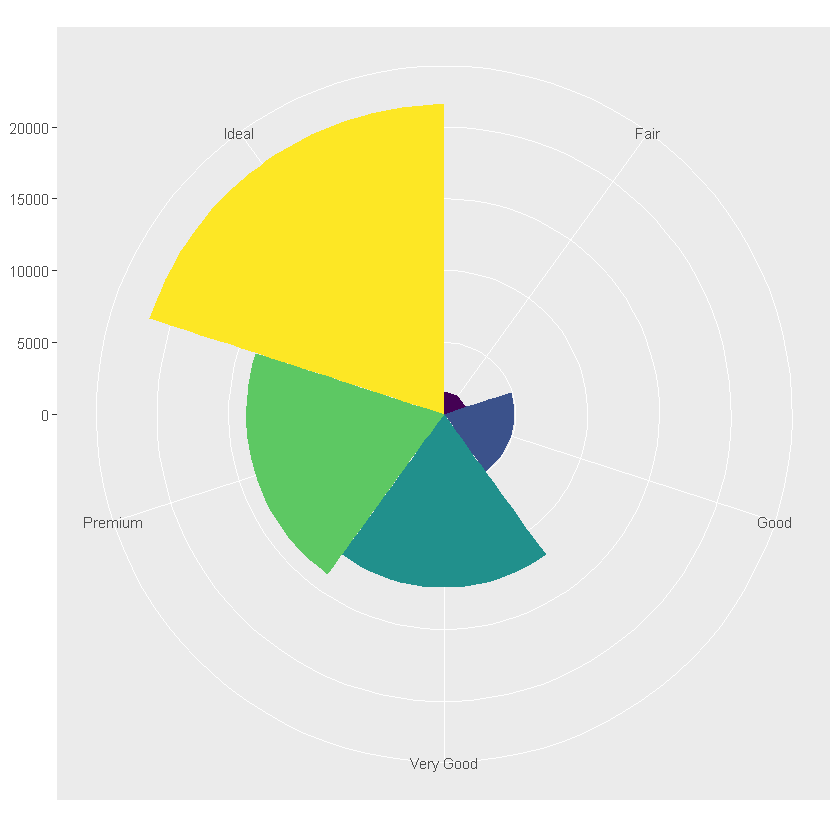

In [48]:
bar <- ggplot(data = diamonds) +
geom_bar(
mapping = aes(x = cut, fill = cut),
show.legend = FALSE,
width = 1
) +
theme(aspect.ratio = 1) +
labs(x = NULL, y = NULL)

bar + coord_flip()

bar + coord_polar()

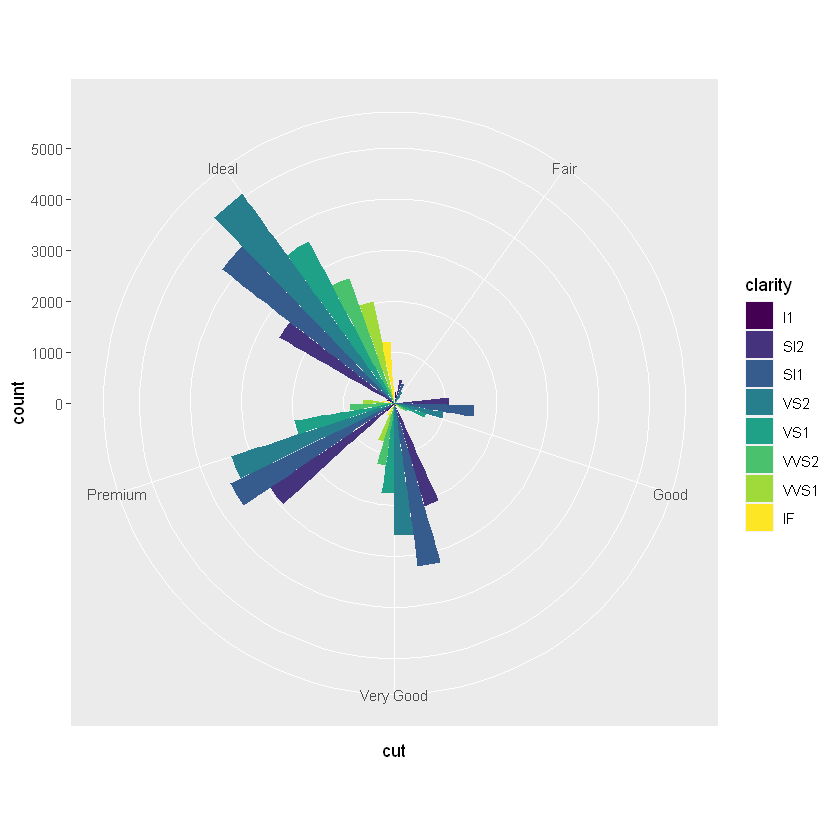

In [49]:
# Exercise Page 33

ggplot(data = diamonds) +
geom_bar(
mapping = aes(x = cut, fill = clarity),
position = "dodge"
) + 
coord_polar()



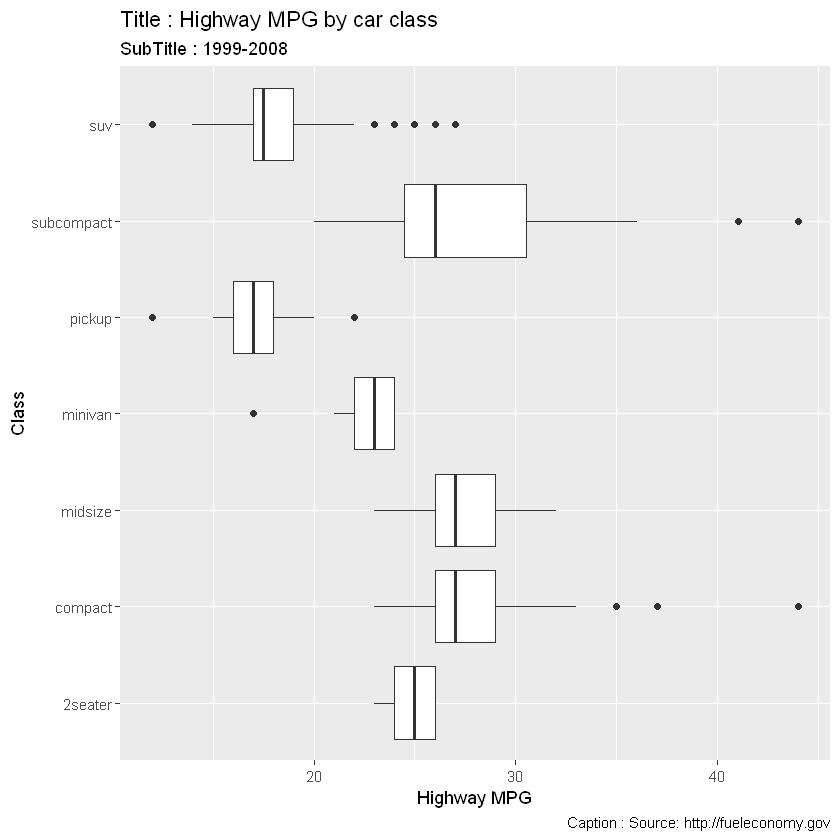

In [53]:
# Exercise Page 33

ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot() +
  coord_flip() +
  labs(y = "Highway MPG",
       x = "Class",
       title = "Title : Highway MPG by car class",
       subtitle = "SubTitle : 1999-2008",
       caption = "Caption : Source: http://fueleconomy.gov")

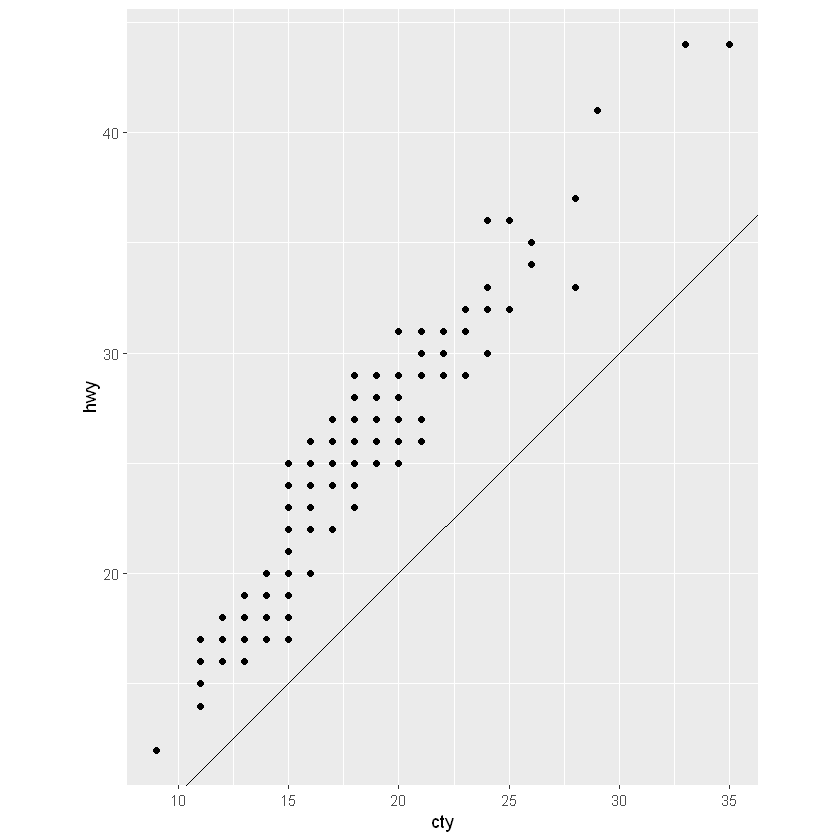

In [54]:
p <- ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() +
  geom_abline()
p + coord_fixed()